In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data = pd.read_csv('./combine_all_v3.csv')
data.head()

,title,user_id,song_id,listen_count,release,artist_name,year,track_id,genre
0,You're The One,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,If There Was A Way,Dwight Yoakam,1990,NaN,NaN
1,You're The One,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,If There Was A Way,Dwight Yoakam,1990,NaN,NaN
2,You're The One,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,If There Was A Way,Dwight Yoakam,1990,NaN,NaN
3,You're The One,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,If There Was A Way,Dwight Yoakam,1990,NaN,NaN
4,You're The One,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,If There Was A Way,Dwight Yoakam,1990,NaN,NaN


# 1. Một người nghe bao nhiêu bài

In [3]:
data.groupby('user_id').song_id.nunique()

user_id
00015189668691680bb1a2e58afde1541ec92ced    1
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2    1
00020fcd8b01986a6a85b896ccde6c49f35142ad    1
0003477fcf455dc4fcae3d7ca5e329cef811c868    1
0003798d61a8010dbfd8010180b7107cbbb8a649    1
                                           ..
fffa8a20b865c4d2443785bab08bb498f0795a43    1
fffd0a1b26c37a55574d844277d176991d054f99    2
fffe29116f96c97b47a5dabdd406784ad0ba6f30    1
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    1
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee    2
Name: song_id, Length: 37187, dtype: int64

Text(0, 0.5, 'User')

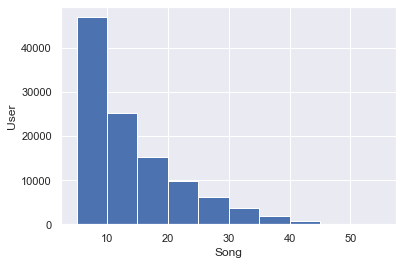

In [15]:
data.user_id.value_counts().plot(kind='hist')
plt.xlabel('Song')
plt.ylabel('User')

# 2. Một người nghe bao nhiêu thể loại

In [8]:
data.groupby('user_id').genre.nunique().value_counts()

0    43624
1    42889
2    17254
3     4914
4     1118
5      174
6       24
7        3
Name: genre, dtype: int64

Text(0, 0.5, 'User')

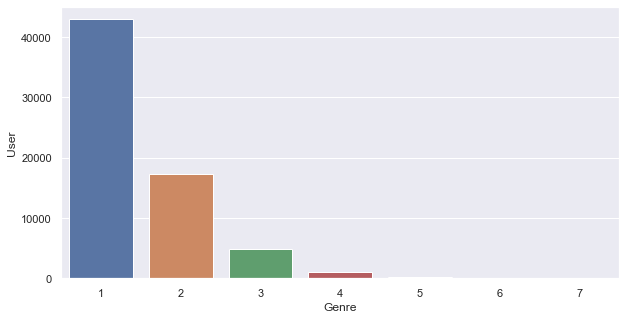

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=data.groupby('user_id').genre.nunique().value_counts()[1:].index, y=data.groupby('user_id').genre.nunique().value_counts()[1:].values)
plt.xlabel('Genre')
plt.ylabel('User')

# 3. Thể loại ưa thích

In [12]:
data.groupby('genre').user_id.nunique()

genre
Avant_Garde           6
Blues                35
Children              3
Classical            13
Comedy_Spoken        46
Country             702
Easy_Listening       22
Electronic         3351
Folk                730
Holiday               1
International       163
Jazz                247
Latin               606
New Age             206
Pop_Rock          29401
Rap                2034
Reggae              419
Religious           636
RnB                1878
Stage                 6
Vocal               140
Name: user_id, dtype: int64

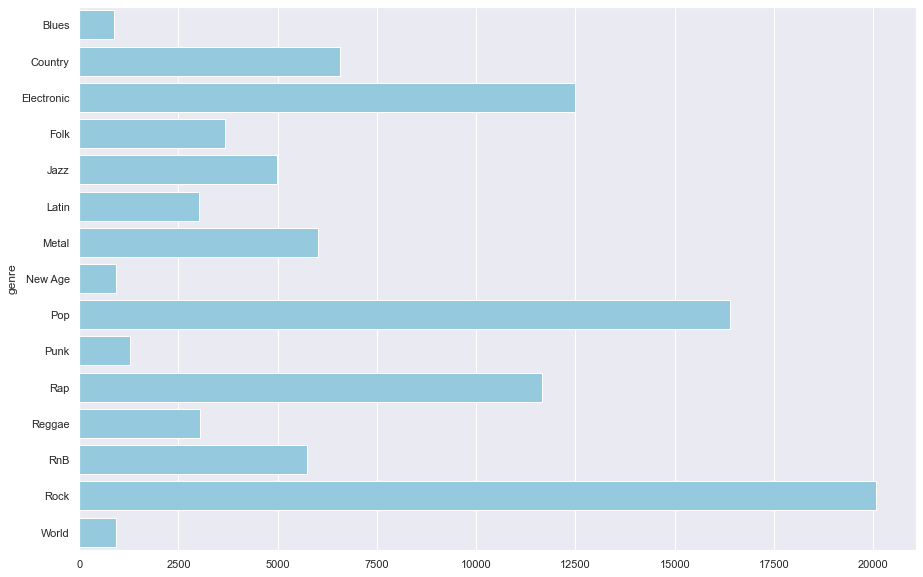

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x=data.groupby('genre').user_id.nunique().values, y=data.groupby('genre').user_id.nunique().index, color='skyblue')

# 4. Một bài được nghe bao nhiêu lần

In [30]:
data.groupby('listen_count').user_id.nunique()[:100]

listen_count
1      24095
2       6984
3       3037
4       1921
5       2147
       ...  
106        1
111        1
116        1
123        1
125        2
Name: user_id, Length: 100, dtype: int64

Text(0, 0.5, 'User')

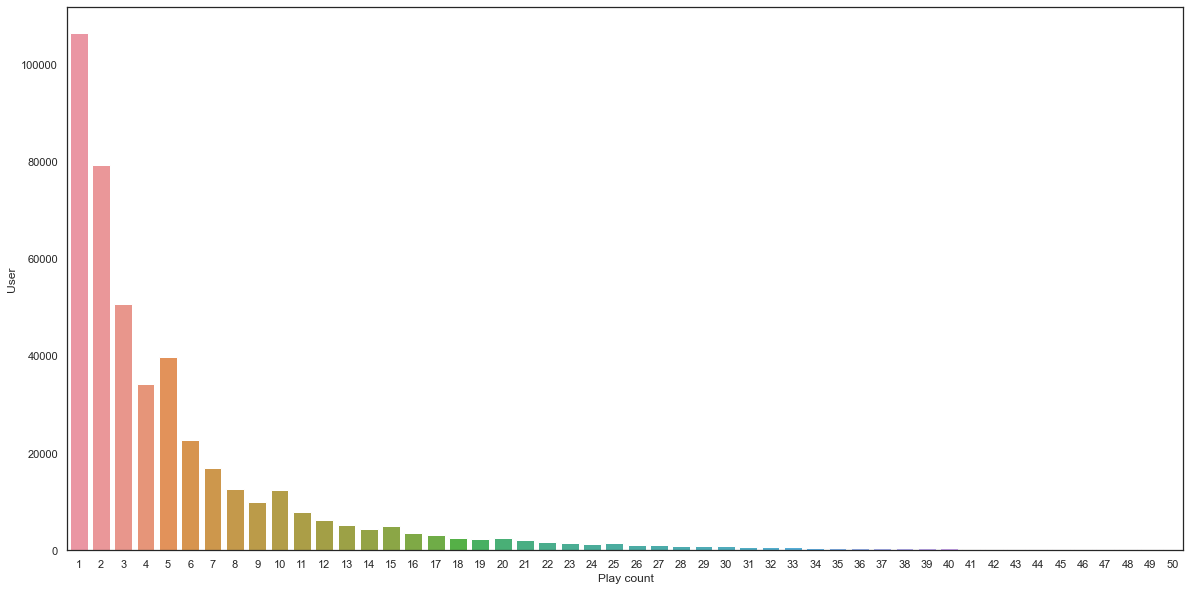

In [23]:
sns.set_style("white")
plt.figure(figsize=(20, 10))
sns.barplot(x=data.groupby('listen_count').user_id.nunique()[:50].index, y=data.groupby('listen_count').user_id.nunique()[:50].values)
plt.xlabel('Play count')
plt.ylabel('User')

# 5. Thời gian phát hành

In [33]:
data[data.year!=0].year.value_counts()

2009    6307
2008    6235
2007    4801
2006    3002
2003    2508
2004    2350
2005    2094
2001    1861
2000    1670
2010    1637
2002    1537
1999    1084
1997     984
1988     710
1998     706
1993     703
1991     668
1996     563
1994     528
1995     510
1992     501
1983     440
1989     386
1984     369
1986     241
1970     226
1990     169
1985     147
1978     133
1987     125
1968     100
1971      91
1979      88
1969      87
1981      82
1967      79
1980      76
1977      74
1982      65
1976      43
1974      34
1973      32
1975      30
1960      19
1972      17
1959      12
1963      11
1965      11
1964       6
1957       4
1955       1
1962       1
Name: year, dtype: int64

Text(0, 0.5, 'Song')

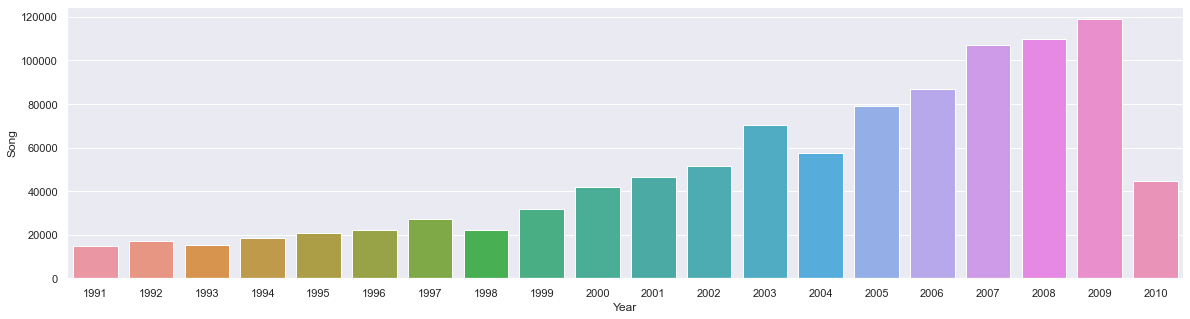

In [20]:
plt.figure(figsize=(20, 5))
sns.set()
sns.barplot(x=data[data.year!=0].year.value_counts()[:20].index, y=data[data.year!=0].year.value_counts()[:20].values)
plt.xlabel('Year')
plt.ylabel('Song')

# 6. Một bài được nghe bởi bao nhiêu người

In [ ]:
len(data.song_id.value_counts())

Text(0, 0.5, 'Song')

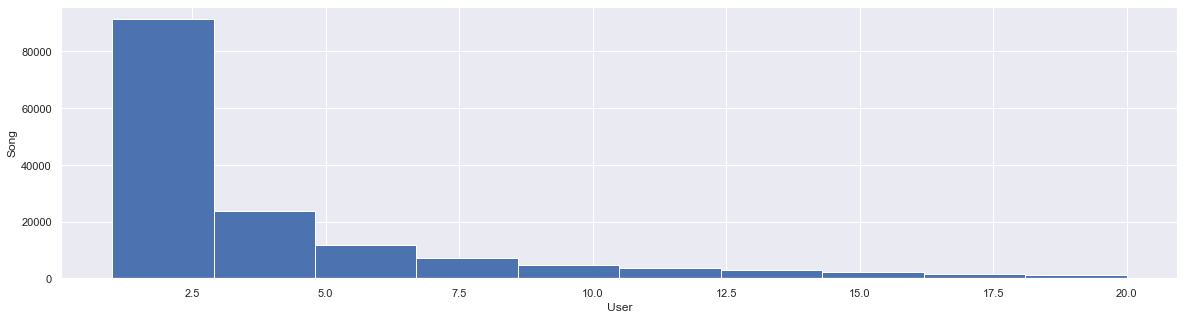

In [27]:
plt.figure(figsize=(20,5))
sns.set()
data.song_id.value_counts()[-150000:].plot(kind='hist')
plt.xlabel('User')
plt.ylabel('Song')

# 7. Phần trăm chỉ nghe một thể loại

In [46]:
g = data[data.genre.notnull()].groupby('user_id').genre
u = list(g.groups.keys())

In [44]:
u

['00015189668691680bb1a2e58afde1541ec92ced',
 '0001ff7aa2667c8d8b945317b88adaed1c0b9dc2',
 '00020fcd8b01986a6a85b896ccde6c49f35142ad',
 '0003d5245414b9c6244046543a06f601bfc97949',
 '00040e91f2f614ca2f94ebc558dd0fc53ea2b875',
 '0004dd6499e2e3f630f070416c437627de60d5c1',
 '0006a8a3733a7009f8bc109ccb3cdb59a19721ad',
 '0006dfb63a4b7b1790a18c4c92da3b9dbcbc02bb',
 '00071174209267a7f504e23d0c48d16f820b69e9',
 '0007151403610e6b0d8c9c7352b2a72144a212d8',
 '000724134199acaa98869fc4ffb805198d2940eb',
 '0007ccf17b03de70b8642e2548fe4c9be3b9e560',
 '0007e2fe805dd791cd082707a85cd616e7808ea5',
 '000923be99eda0ecf81ca3351794f80dd758f696',
 '000a43eb37163bb2f93020e107a2d543f27257b7',
 '000ae9c80733348ff64cd3716a27477b94578d9d',
 '000b8aba8fde15a79a947b2fdaacf162726d4630',
 '000d1ab78dfe1ed9201b762370743af08dc53f5b',
 '000e9f98723b794e38d0415feb456eaac0e63285',
 '000f7987ddcba4eefb4a3f37d78c3347d887a1e7',
 '000ff0be2ddd080905d46d155d2c3821cc127040',
 '0011d5f4fb02ff276763d385c3f2ded2b00ad94a',
 '00133eb8

In [58]:
g.get_group(u[50]).value_counts()

2

In [61]:
d = dict()
for i in range(len(u)):
    d[u[i]] = g.get_group(u[i]).value_counts().max() / g.get_group(u[i]).value_counts().sum()

In [62]:
d

{'00015189668691680bb1a2e58afde1541ec92ced': 0.5,
 '0001ff7aa2667c8d8b945317b88adaed1c0b9dc2': 1.0,
 '00020fcd8b01986a6a85b896ccde6c49f35142ad': 0.5,
 '0003d5245414b9c6244046543a06f601bfc97949': 0.25,
 '00040e91f2f614ca2f94ebc558dd0fc53ea2b875': 0.6666666666666666,
 '0004dd6499e2e3f630f070416c437627de60d5c1': 1.0,
 '0006a8a3733a7009f8bc109ccb3cdb59a19721ad': 0.8,
 '0006dfb63a4b7b1790a18c4c92da3b9dbcbc02bb': 1.0,
 '00071174209267a7f504e23d0c48d16f820b69e9': 1.0,
 '0007151403610e6b0d8c9c7352b2a72144a212d8': 1.0,
 '000724134199acaa98869fc4ffb805198d2940eb': 0.5,
 '0007ccf17b03de70b8642e2548fe4c9be3b9e560': 1.0,
 '0007e2fe805dd791cd082707a85cd616e7808ea5': 1.0,
 '000923be99eda0ecf81ca3351794f80dd758f696': 1.0,
 '000a43eb37163bb2f93020e107a2d543f27257b7': 0.42857142857142855,
 '000ae9c80733348ff64cd3716a27477b94578d9d': 1.0,
 '000b8aba8fde15a79a947b2fdaacf162726d4630': 0.3333333333333333,
 '000d1ab78dfe1ed9201b762370743af08dc53f5b': 0.5,
 '000e9f98723b794e38d0415feb456eaac0e63285': 1.0,
 '0

In [71]:
data = pd.Series(list(d.values()))

In [70]:
list(d.values())

[0.5,
 1.0,
 0.5,
 0.25,
 0.6666666666666666,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.42857142857142855,
 1.0,
 0.3333333333333333,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 0.25,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.5,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 0.4,
 0.5,
 1.0,
 0.5,
 0.5,
 1.0,
 1.0,
 0.3333333333333333,
 0.75,
 0.5,
 0.4,
 0.5,
 0.5,
 0.25,
 1.0,
 0.5,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 0.6,
 1.0,
 1.0,
 0.6,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.3333333333333333,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 0.5,
 0.3333333333333333,
 0.5,
 0.5,
 1.0,
 0.5,
 0.2857142857142857,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.6666666666666666,
 1.0,
 1.0,
 1.0,
 0.8,
 0

In [72]:
data

0        0.500000
1        1.000000
2        0.500000
3        0.250000
4        0.666667
           ...   
66371    1.000000
66372    0.500000
66373    0.500000
66374    0.666667
66375    0.333333
Length: 66376, dtype: float64

Text(0.5, 0, 'Percent')

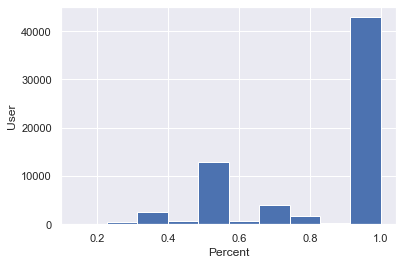

In [74]:
data.plot(kind='hist')
plt.ylabel('User')
plt.xlabel('Percent')